Import Librarys

In [ ]:
import pandas as pd
import numpy as np


Import the Data

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Split Dependent and Independent Variable


In [ ]:
x = data.iloc[:,3:13].values
y = data.iloc[:,13].values

In [ ]:
print(x.shape)

(10000, 10)


Encoding Catagerical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le1 = LabelEncoder()
x[:,1]= le1.fit_transform(x[:,1])
le2 = LabelEncoder()
x[:,2]= le2.fit_transform(x[:,2])

Split the Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = 0)

In [ ]:
print("the shape of x_trin : ", x_train.shape)
print("the x_test shape is : ",x_test.shape)

the shape of x_trin :  (7500, 10)
the x_test shape is :  (2500, 10)


In [ ]:
print(x_train)

[[579 1 0 ... 0 0 5831.0]
 [750 0 0 ... 1 0 95611.47]
 [729 2 0 ... 1 1 42855.97]
 ...
 [738 0 1 ... 1 0 181429.87]
 [590 2 0 ... 1 1 148750.16]
 [623 1 0 ... 1 0 118855.26]]


Scalling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_test)

[[-0.55025082  0.31266104 -1.08726059 ...  0.64365658  0.96668786
   1.61203027]
 [-1.31185979 -0.89235324 -1.08726059 ...  0.64365658 -1.03446007
   0.49626891]
 [ 0.57157862  1.51767532 -1.08726059 ...  0.64365658  0.96668786
  -0.42502785]
 ...
 [ 1.95070838 -0.89235324 -1.08726059 ...  0.64365658 -1.03446007
  -0.272747  ]
 [ 0.29369426  0.31266104  0.91974271 ...  0.64365658 -1.03446007
  -0.93306558]
 [ 0.870047   -0.89235324  0.91974271 ... -1.55362351 -1.03446007
  -0.47380732]]


Importing Keras Librarys

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Create a object ANN

In [ ]:
classifier = Sequential()

Input Layer

In [ ]:
classifier.add(Dense(input_dim=10,kernel_initializer='uniform',activation='relu',units=5))


Hidden Layer

In [ ]:
classifier.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))


Output Layer


In [ ]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

Compile the ANN

In [ ]:
classifier.compile(loss='binary_crossentropy',optimizer='ADAM',metrics='accuracy')

Fit the ANN 

In [ ]:
E=25
h=classifier.fit(x_train,y_train,epochs=E,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.5076 - accuracy: 0.7961 - val_loss: 0.4398 - val_accuracy: 0.7964
Epoch 2/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.7963 - val_loss: 0.4319 - val_accuracy: 0.7964
Epoch 3/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7963 - val_loss: 0.4292 - val_accuracy: 0.7964
Epoch 4/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4304 - accuracy: 0.7963 - val_loss: 0.4250 - val_accuracy: 0.7964
Epoch 5/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8157 - val_loss: 0.4175 - val_accuracy: 0.8236
Epoch 6/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4207 - accuracy: 0.8252 - val_loss: 0.4141 - val_accuracy: 0.8316
Epoch 7/25
750/750 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8291 - val_loss: 0.4095 - val_accuracy: 0.8356
Epoch 

In [ ]:
y_pred = classifier.predict(x_train)
print(y_pred)

[[0.26528436]
 [0.06254041]
 [0.08661419]
 ...
 [0.16297638]
 [0.07864821]
 [0.78118485]]


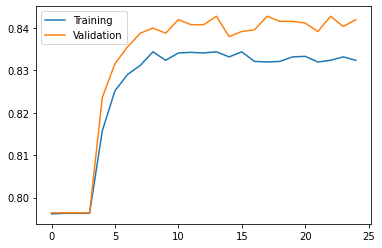

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()